In [111]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [112]:
df = pd.read_csv("Churn_Modelling.csv")
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5898,5899,15713637,Chinedum,699,France,Male,34,2,117468.67,1,1,0,185227.42,0
8373,8374,15785167,Padovano,795,Spain,Male,29,4,0.00,2,0,0,155711.64,0
7240,7241,15591552,Okonkwo,600,France,Female,32,7,98877.95,1,1,0,132973.21,0
1823,1824,15711219,Jennings,788,Germany,Female,57,8,93716.72,1,1,1,180150.49,1
2541,2542,15679770,Smith,611,France,Female,61,3,131583.59,4,0,1,66238.23,1


In [113]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

**Dropping Unnecessary Rows**

In [114]:
df.drop(['RowNumber', 'CustomerId', 'Surname'],axis='columns',inplace=True)

In [115]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Removing Outlier**

In [116]:
lower_limit = df.Balance.mean() - 2*df.Balance.std()
lower_limit

-48308.921116771904

In [117]:
upper_limit = df.Balance.mean() + 2*df.Balance.std()
upper_limit

201280.69969277192

In [118]:
df.shape

(10000, 11)

In [119]:
df1 = df[(df.Balance<upper_limit) & (df.Balance>lower_limit)]
df1.shape

(9970, 11)

In [120]:
lower_limit = df1.EstimatedSalary.mean() - 2*df1.EstimatedSalary.std()
lower_limit

-14971.718970745453

In [121]:
upper_limit = df1.EstimatedSalary.mean() + 2*df1.EstimatedSalary.std()
upper_limit

215104.57993764617

In [122]:
df1.Balance.min()

0.0

In [123]:
df1.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [124]:
df1.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [125]:
df1.shape

(9970, 11)

**Visualizing Data**

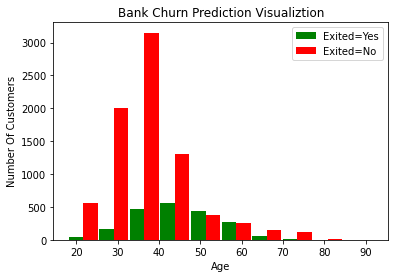

In [126]:
age_exit_no = df1[df1.Exited==0].Age
age_exit_yes = df1[df1.Exited==1].Age

plt.xlabel("Age")
plt.ylabel("Number Of Customers")
plt.title("Bank Churn Prediction Visualiztion")

plt.hist([age_exit_yes, age_exit_no], rwidth=0.95, color=['green','red'],label=['Exited=Yes','Exited=No'])
plt.legend()

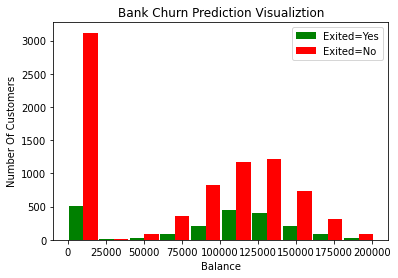

In [127]:
bl_exit_no = df1[df1.Exited==0].Balance
bl_exit_yes = df1[df1.Exited==1].Balance

plt.xlabel("Balance")
plt.ylabel("Number Of Customers")
plt.title("Bank Churn Prediction Visualiztion")

plt.hist([bl_exit_yes, bl_exit_no], rwidth=0.95, color=['green','red'],label=['Exited=Yes','Exited=No'])
plt.legend()

In [128]:
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**One Hot Encoding**

In [129]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [130]:
print_unique_col_values(df1)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [131]:
df1['Gender'].replace({'Female':1,'Male':0},inplace=True)

In [132]:
df2 = pd.get_dummies(data=df1, columns=['Geography'])
df2.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1


**Data Scaling**

In [133]:
cols_to_scale = ['CreditScore','Age','Tenure','Balance', 'NumOfProducts', 'EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [134]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

CreditScore: [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.458 0.626 0.664 0.886
 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734 0.9
 0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856 0.328
 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642 0.678
 0.54  0.652 0.444 0.69  0.484 0.434 0.688

In [135]:
df2.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,1,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0
1,0.516,1,0.310811,0.1,0.416935,0.000000,0,1,0.562709,0,0,0,1
2,0.304,1,0.324324,0.8,0.794294,0.666667,1,0,0.569654,1,1,0,0
3,0.698,1,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0
4,1.000,1,0.337838,0.2,0.624402,0.000000,1,1,0.395400,0,0,0,1


**Splitting Dataset into Training and Testing**

In [136]:
X = df2.drop('Exited',axis='columns')
y = df2['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [137]:
X_train.shape

(7976, 12)

In [138]:
X_test.shape

(1994, 12)

In [139]:
X_train[:10]

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
1557,0.330,0,0.256757,0.2,0.449893,0.000000,1,1,0.941862,0,1,0
142,0.664,1,0.337838,0.5,0.626099,0.000000,1,1,0.966626,1,0,0
6968,0.320,1,0.432432,0.7,0.616570,0.000000,1,1,0.118793,0,1,0
6613,0.348,1,0.135135,0.7,0.000000,0.333333,0,1,0.735516,1,0,0
350,0.618,0,0.189189,0.3,0.535268,0.333333,1,1,0.512075,0,0,1
5853,0.492,0,0.297297,0.5,0.310378,0.666667,1,0,0.743130,0,1,0
9811,0.590,1,0.175676,0.1,0.641402,0.000000,1,1,0.014194,0,1,0
2370,0.258,1,0.229730,0.2,0.562612,0.000000,1,0,0.978284,1,0,0
4056,0.610,1,0.135135,0.3,0.566201,0.333333,0,1,0.384200,0,0,1
2381,0.528,1,0.310811,0.7,0.895061,0.000000,0,0,0.073281,0,0,1


In [140]:
len(X_train.columns)

12

**Building Models**

In [141]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(12, input_shape=(12,), activation='relu'),
    keras.layers.Dense(7, activation='relu'),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50)

Epoch 1/50
250/250 [==============================] - 1s 3ms/step - loss: 0.5150 - accuracy: 0.7914
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4667 - accuracy: 0.7989
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4519 - accuracy: 0.8039
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4419 - accuracy: 0.8104
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4336 - accuracy: 0.8176
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4263 - accuracy: 0.8238
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4213 - accuracy: 0.8269
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4166 - accuracy: 0.8274
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4122 - accuracy: 0.8276
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4093 - accuracy: 0.8256

**Model Evaluation**

In [142]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.3550 - accuracy: 0.8631


[0.3550052046775818, 0.8630892634391785]

In [143]:
yp = model.predict(X_test)

63/63 [==============================] - 0s 1ms/step


In [144]:
yp[:5]

array([[0.17886935],
       [0.04428644],
       [0.09078362],
       [0.08149123],
       [0.03005691]], dtype=float32)

In [145]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [146]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [147]:
y_test[:10]

7540    0
5401    0
9161    0
3640    0
1076    0
8398    1
5870    0
5727    1
4514    0
4471    1
Name: Exited, dtype: int64

**Classification Report and Confusion Matrix**

In [148]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1578
           1       0.81      0.44      0.58       416

    accuracy                           0.86      1994
   macro avg       0.84      0.71      0.75      1994
weighted avg       0.86      0.86      0.85      1994



Text(69.0, 0.5, 'Truth')

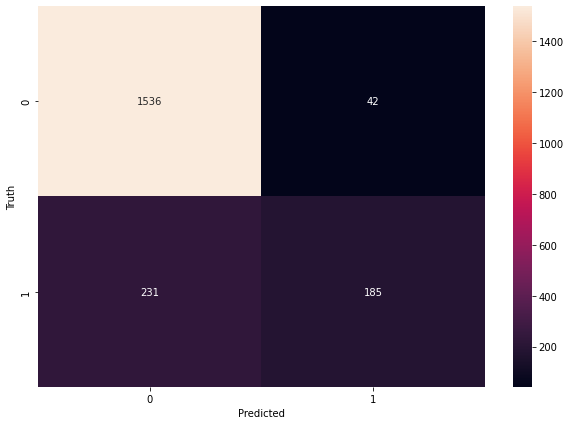

In [149]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')